In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('goodreads_data.csv')
data.head(100)

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...
95,95,The Brothers Karamazov,Fyodor Dostoevsky,"The Brothers Karamazov is a murder mystery, a ...","['Classics', 'Fiction', 'Russia', 'Literature'...",4.36,"304,800",https://www.goodreads.com/book/show/4934.The_B...
96,96,The Poisonwood Bible,Barbara Kingsolver,The Poisonwood Bible is a story told by the wi...,"['Fiction', 'Historical Fiction', 'Africa', 'C...",4.09,"716,880",https://www.goodreads.com/book/show/7244.The_P...
97,97,I Know Why the Caged Bird Sings (Maya Angelou'...,Maya Angelou,Maya Angelou’s debut memoir is a modern Americ...,"['Nonfiction', 'Classics', 'Memoir', 'Biograph...",4.28,"501,912",https://www.goodreads.com/book/show/13214.I_Kn...
98,98,The Book of Mormon: Another Testament of Jesus...,Joseph Smith Jr.,This work has been selected by scholars as bei...,"['Religion', 'Nonfiction', 'Lds', 'Church', 'S...",4.26,"83,595",https://www.goodreads.com/book/show/323355.The...


In [7]:
# PREPROCESS 1

data = data.dropna()  # Drop rows with missing values

# Fill missing values with the mean of the column
data['Avg_Rating'] = data['Avg_Rating'].fillna(data['Avg_Rating'].mean())


In [10]:
# Text cleaning: If you plan to analyze the text data, 
# it's important to clean the text by removing punctuation, converting to lowercase, removing stopwords,
# and performing other text-specific preprocessing steps.

import re
import nltk
from nltk.corpus import stopwords

# Text cleaning function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    return text

# Apply text cleaning to the Description column
data['Description'] = data['Description'].apply(clean_text)

data.head()


,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,unforgettable novel childhood sleepy southern ...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,harry potter thinks ordinary boy rescued owl t...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,since immediate success 1813 pride prejudice r...,"['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,discovered attic spent last years life anne fr...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,librarians note alternate cover edition editio...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


In [11]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Scale the numerical features
data[['Avg_Rating', 'Num_Ratings']] = scaler.fit_transform(data[['Avg_Rating', 'Num_Ratings']])


ValueError: could not convert string to float: '5,691,311'

In [16]:
# to remove commas here we use : 

# Convert 'Num_Ratings' column to string
data['Num_Ratings'] = data['Num_Ratings'].astype(str)

# Remove commas from 'Num_Ratings' column
data['Num_Ratings'] = data['Num_Ratings'].str.replace(',', '')

# Convert 'Num_Ratings' column to float
data['Num_Ratings'] = data['Num_Ratings'].astype(float)

# Print the updated dataset
# print(data)
data


,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,unforgettable novel childhood sleepy southern ...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,5691311.0,https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,harry potter thinks ordinary boy rescued owl t...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135.0,https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,since immediate success 1813 pride prejudice r...,"['Classics', 'Fiction', 'Romance', 'Historical...",4.28,3944155.0,https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,discovered attic spent last years life anne fr...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,3488438.0,https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,librarians note alternate cover edition editio...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,3575172.0,https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,far would go human society genuinely risk crue...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276.0,https://www.goodreads.com/book/show/22085400-b...
9996,9996,Dynamo,Eleanor Gustafson,jeth cavanaugh searching new life along one pe...,[],4.23,60.0,https://www.goodreads.com/book/show/20862902-d...
9997,9997,The Republic of Trees,Sam Taylor,dark fable tells story four english children r...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383.0,https://www.goodreads.com/book/show/891262.The...
9998,9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,adriana monroe life couldnt get better great f...,"['New Adult', 'Romance', 'Contemporary Romance...",4.13,263.0,https://www.goodreads.com/book/show/19347252-w...


In [19]:
# Feature scaling: If your dataset contains numerical features with different scales, it might be beneficial to scale the features to a similar range to avoid any bias in the analysis. You can use techniques such as min-max scaling or standardization.

from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Scale the numerical features
data[['Avg_Rating', 'Num_Ratings']] = scaler.fit_transform(data[['Avg_Rating', 'Num_Ratings']])
data.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,unforgettable novel childhood sleepy southern ...,"['Classics', 'Fiction', 'Historical Fiction', ...",0.854,0.613411,https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,harry potter thinks ordinary boy rescued owl t...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",0.894,1.000000,https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,since immediate success 1813 pride prejudice r...,"['Classics', 'Fiction', 'Romance', 'Historical...",0.856,0.425102,https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,discovered attic spent last years life anne fr...,"['Classics', 'Nonfiction', 'History', 'Biograp...",0.836,0.375985,https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,librarians note alternate cover edition editio...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",0.796,0.385333,https://www.goodreads.com/book/show/170448.Ani...


In [27]:

#  REMOVING MISSING NANS COLUMNS
# Display the count of missing values in each column
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Remove rows with any missing value
data = data.dropna()

# Display the updated dataset
print("\nUpdated Dataset:")
# print(data)
data
# data.isnull().sum


Missing Values:
 Unnamed: 0     0
Book           0
Author         0
Description    0
Genres         0
Avg_Rating     0
Num_Ratings    0
URL            0
dtype: int64

Updated Dataset:


,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276,https://www.goodreads.com/book/show/22085400-b...
9996,9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[],4.23,60,https://www.goodreads.com/book/show/20862902-d...
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383,https://www.goodreads.com/book/show/891262.The...
9998,9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance...",4.13,263,https://www.goodreads.com/book/show/19347252-w...


In [29]:
# Count the number of missing values in the 'Description' column
missing_values = data['Description'].isnull().sum()
print("Number of Missing Values in 'Description':", missing_values)

# Replace missing values with an empty string
data['Description'] = data['Description'].fillna('')

# Apply TF-IDF vectorization
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['Description'])
genre_labels = data['Genres']

# Print the results
genre_results = pd.DataFrame({'Book': data['Book'], 'Genres': genre_labels})
# print(genre_results)
genre_results

Number of Missing Values in 'Description': 0


,Book,Genres
0,To Kill a Mockingbird,"['Classics', 'Fiction', 'Historical Fiction', ..."
1,Harry Potter and the Philosopher’s Stone (Harr...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',..."
2,Pride and Prejudice,"['Classics', 'Fiction', 'Romance', 'Historical..."
3,The Diary of a Young Girl,"['Classics', 'Nonfiction', 'History', 'Biograp..."
4,Animal Farm,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',..."
...,...,...
9995,"Breeders (Breeders Trilogy, #1)","['Dystopia', 'Science Fiction', 'Post Apocalyp..."
9996,Dynamo,[]
9997,The Republic of Trees,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A..."
9998,"Waking Up (Healing Hearts, #1)","['New Adult', 'Romance', 'Contemporary Romance..."


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('goodreads_data.csv')

# Clean the 'Num_Ratings' column by removing commas
data['Num_Ratings'] = data['Num_Ratings'].str.replace(',', '')

# Convert the 'Num_Ratings' column to float
data['Num_Ratings'] = data['Num_Ratings'].astype(float)
data

# # Select relevant features for popularity prediction
# features = ['Avg_Rating', 'Num_Ratings']
# target = 'Popularity'  # You can define your own popularity metric

# # Create a derived popularity metric based on the number of ratings
# data['Popularity'] = data['Num_Ratings']

# # Split the data into train and test sets
# train_data, test_data, train_target, test_target = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# # Train a linear regression model
# regressor = LinearRegression()
# regressor.fit(train_data, train_target)

# # Predict popularity for test data
# predictions = regressor.predict(test_data)

# # Print the results
# popularity_results = pd.DataFrame({'Book': test_data['Book'], 'Actual Popularity': test_target, 'Predicted Popularity': predictions})
# print(popularity_results)


,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,5691311.0,https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135.0,https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,3944155.0,https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,3488438.0,https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,3575172.0,https://www.goodreads.com/book/show/170448.Ani...
...,...,...,...,...,...,...,...,...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276.0,https://www.goodreads.com/book/show/22085400-b...
9996,9996,Dynamo,Eleanor Gustafson,Jeth Cavanaugh is searching for a new life alo...,[],4.23,60.0,https://www.goodreads.com/book/show/20862902-d...
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383.0,https://www.goodreads.com/book/show/891262.The...
9998,9998,"Waking Up (Healing Hearts, #1)",Renee Dyer,For Adriana Monroe life couldn’t get any bette...,"['New Adult', 'Romance', 'Contemporary Romance...",4.13,263.0,https://www.goodreads.com/book/show/19347252-w...


In [35]:
print(data.columns)


Index(['Unnamed: 0', 'Book', 'Author', 'Description', 'Genres', 'Avg_Rating',
       'Num_Ratings', 'URL'],
      dtype='object')


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('goodreads_data.csv')

# Select relevant features for popularity prediction
features = ['Avg_Rating', 'Num_Ratings']
target = 'Popularity'  # Replace with the appropriate column name or popularity metric

# Clean the 'Num_Ratings' column by removing commas
data['Num_Ratings'] = data['Num_Ratings'].str.replace(',', '')

# Convert the 'Num_Ratings' column to float
data['Num_Ratings'] = data['Num_Ratings'].astype(float)

# Split the data into train and test sets
train_data, test_data = train_test_split(data[features], test_size=0.2, random_state=42)
train_target = train_data[target].values
test_target = test_data[target].values

# Remove the target column from the feature datasets
train_data = train_data.drop(columns=[target])
test_data = test_data.drop(columns=[target])

# Train a linear regression model
regressor = LinearRegression()
regressor.fit(train_data, train_target)

# Predict popularity for test data
predictions = regressor.predict(test_data)

# Print the results
popularity_results = pd.DataFrame({'Book': test_data['Book'], 'Actual Popularity': test_target, 'Predicted Popularity': predictions})
print(popularity_results)


KeyError: 'Popularity'

In [40]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('goodreads_data.csv')

# Select relevant columns for author analysis
author_data = data[['Author', 'Description']]

# Drop rows with missing values
author_data = author_data.dropna()

# Preprocess the text data
# Here, you can apply any necessary text preprocessing steps such as lowercase conversion, removing stopwords, or stemming/lemmatization

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Apply TF-IDF vectorization to the book descriptions
description_vectors = vectorizer.fit_transform(author_data['Description'])

# Apply K-means clustering to group authors based on writing styles
num_clusters = 5  # Adjust the number of clusters based on your dataset and desired granularity
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(description_vectors)

# Add the cluster labels to the author data
author_data['Cluster'] = kmeans.labels_

# Print the cluster assignments for each author
print(author_data[['Author', 'Cluster']])


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                 Author  Cluster
0            Harper Lee        1
1          J.K. Rowling        0
2           Jane Austen        0
3            Anne Frank        1
4         George Orwell        0
...                 ...      ...
9995     Ashley Quigley        2
9996  Eleanor Gustafson        0
9997         Sam Taylor        1
9998         Renee Dyer        3
9999        Jas T. Ward        0

[9923 rows x 2 columns]


In [3]:
print("VISUAL ANALYSIS")


VISUAL ANALYSIS


NameError: name 'data' is not defined

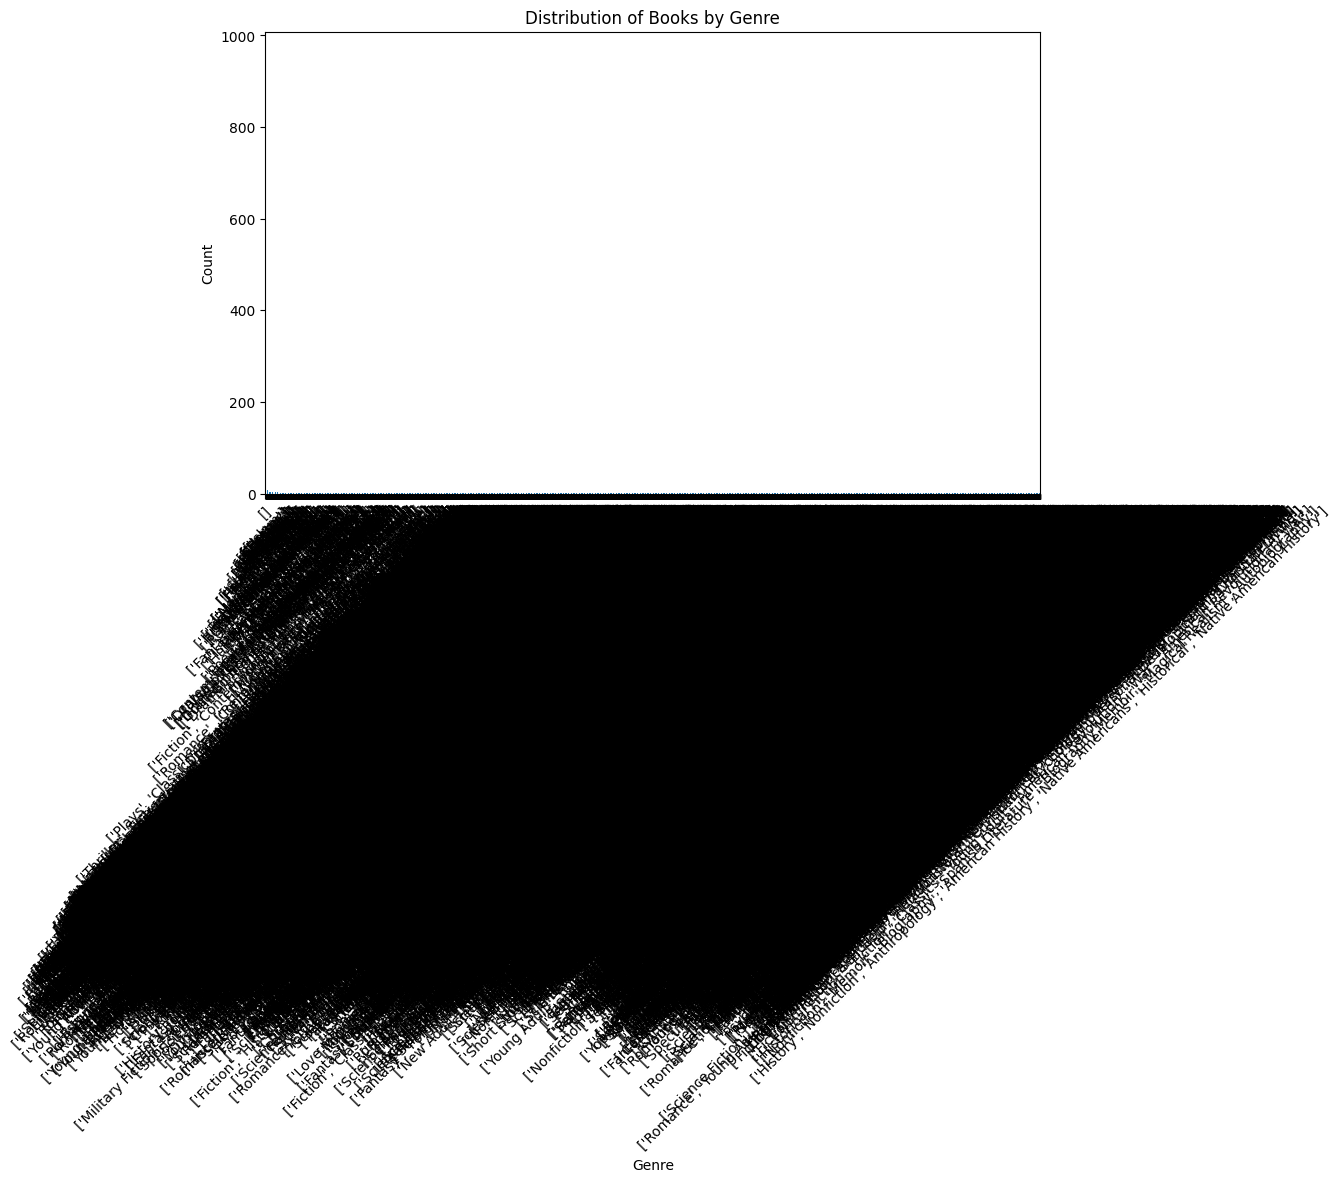

In [42]:
import matplotlib.pyplot as plt

# Count the number of books in each genre
genre_counts = data['Genres'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Distribution of Books by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


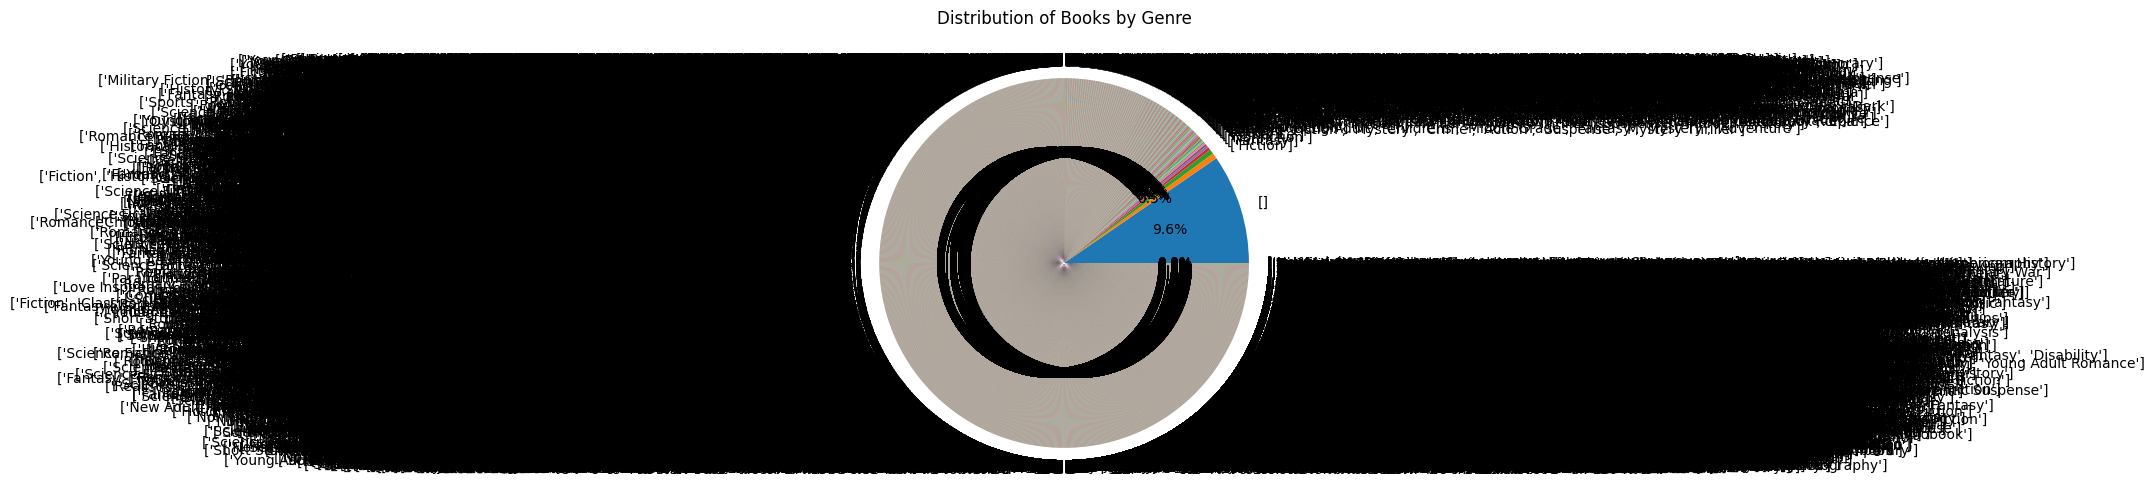

In [43]:
plt.figure(figsize=(8, 6))
genre_counts = data['Genres'].value_counts()
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Books by Genre')
plt.show()

In [44]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('goodreads_data.csv')

# Preprocess the data
# Remove rows with missing values in the 'Description' and 'Genres' columns
data.dropna(subset=['Description', 'Genres'], inplace=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Description'], data['Genres'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


MemoryError: Unable to allocate 3.00 GiB for an array with shape (61758, 6510) and data type float64

In [49]:
print('''To address the MemoryError issue, you can modify the code to use a sparse representation for the vectorized data. Here's an updated version of the code that uses the scipy.sparse module to represent the vectorized data:''')

To address the MemoryError issue, you can modify the code to use a sparse representation for the vectorized data. Here's an updated version of the code that uses the scipy.sparse module to represent the vectorized data:


In [50]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import csr_matrix

# Load the dataset
data = pd.read_csv('goodreads_data.csv')

# Preprocess the data
# Remove rows with missing values in the 'Description' and 'Genres' columns
data.dropna(subset=['Description', 'Genres'], inplace=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Description'], data['Genres'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Convert the vectorized data to sparse format
X_train_vectorized = csr_matrix(X_train_vectorized)
X_test_vectorized = csr_matrix(X_test_vectorized)

# Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


MemoryError: Unable to allocate 3.00 GiB for an array with shape (6510, 61758) and data type float64

In [51]:
print('''If you're experiencing a MemoryError even after converting the data to a sparse format, you can try using a technique called mini-batch vectorization to process the data in smaller batches. This approach allows you to reduce the memory usage by vectorizing and processing a subset of the data at a time.

Here's an example of how you can modify the code to use mini-batch vectorization:''')

If you're experiencing a MemoryError even after converting the data to a sparse format, you can try using a technique called mini-batch vectorization to process the data in smaller batches. This approach allows you to reduce the memory usage by vectorizing and processing a subset of the data at a time.

Here's an example of how you can modify the code to use mini-batch vectorization:


In [52]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import vstack

# Load the dataset
data = pd.read_csv('goodreads_data.csv')

# Preprocess the data
# Remove rows with missing values in the 'Description' and 'Genres' columns
data.dropna(subset=['Description', 'Genres'], inplace=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Description'], data['Genres'], test_size=0.2, random_state=42)

# Define the mini-batch size
batch_size = 1000

# Initialize an empty sparse matrix to store the vectorized data
X_train_vectorized = None

# Iterate over the training data in mini-batches
for i in range(0, len(X_train), batch_size):
    # Extract the current mini-batch
    batch_X = X_train[i:i+batch_size]

    # Vectorize the current mini-batch
    vectorizer = TfidfVectorizer()
    batch_X_vectorized = vectorizer.fit_transform(batch_X)

    # Append the vectorized data to the overall matrix
    if X_train_vectorized is None:
        X_train_vectorized = batch_X_vectorized
    else:
        X_train_vectorized = vstack([X_train_vectorized, batch_X_vectorized])

# Vectorize the test data
vectorizer = TfidfVectorizer()
X_test_vectorized = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


ValueError: incompatible dimensions for axis 1

In [53]:
print('''The "incompatible dimensions for axis 1" error typically occurs when the dimensions of the sparse matrices you're trying to concatenate using scipy.sparse.vstack (vstack) are not compatible along the second axis (columns). This error can arise if the feature dimensions of the mini-batches are not consistent.

To resolve this issue, you can ensure that the feature dimensions of the mini-batches are the same before concatenating them. One possible cause for inconsistent feature dimensions is the vocabulary mismatch between the mini-batches. To address this, you need to ensure that the vectorizer used for each mini-batch has the same vocabulary as the initial vectorizer fitted on the entire training set.

Here's an updated version of the code that addresses the vocabulary mismatch issue:''')

The "incompatible dimensions for axis 1" error typically occurs when the dimensions of the sparse matrices you're trying to concatenate using scipy.sparse.vstack (vstack) are not compatible along the second axis (columns). This error can arise if the feature dimensions of the mini-batches are not consistent.

To resolve this issue, you can ensure that the feature dimensions of the mini-batches are the same before concatenating them. One possible cause for inconsistent feature dimensions is the vocabulary mismatch between the mini-batches. To address this, you need to ensure that the vectorizer used for each mini-batch has the same vocabulary as the initial vectorizer fitted on the entire training set.

Here's an updated version of the code that addresses the vocabulary mismatch issue:


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import vstack

# Load the dataset
data = pd.read_csv('goodreads_data.csv')

# Preprocess the data
# Remove rows with missing values in the 'Description' and 'Genres' columns
data.dropna(subset=['Description', 'Genres'], inplace=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Description'], data['Genres'], test_size=0.2, random_state=42)

# Define the mini-batch size
batch_size = 1000

# Initialize an empty sparse matrix to store the vectorized data
X_train_vectorized = None

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Iterate over the training data in mini-batches
for i in range(0, len(X_train), batch_size):
    # Extract the current mini-batch
    batch_X = X_train[i:i+batch_size]

    # Vectorize the current mini-batch
    batch_X_vectorized = vectorizer.transform(batch_X)

    # Append the vectorized data to the overall matrix
    if X_train_vectorized is None:
        X_train_vectorized = batch_X_vectorized
    else:
        X_train_vectorized = vstack([X_train_vectorized, batch_X_vectorized])

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
# data

NotFittedError: The TF-IDF vectorizer is not fitted

In [56]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# from scipy.sparse import vstack

# # Load the dataset
# data = pd.read_csv('goodreads_data.csv')

# # Preprocess the data
# # Remove rows with missing values in the 'Description' and 'Genres' columns
# data.dropna(subset=['Description', 'Genres'], inplace=True)

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(data['Description'], data['Genres'], test_size=0.2, random_state=42)

# # Define the mini-batch size
# batch_size = 1000

# # Initialize an empty sparse matrix to store the vectorized data
# X_train_vectorized = None

# # Initialize the vectorizer
# vectorizer = TfidfVectorizer()

# # Fit the vectorizer on the training data
# vectorizer.fit(X_train)

# # Iterate over the training data in mini-batches
# for i in range(0, len(X_train), batch_size):
#     # Extract the current mini-batch
#     batch_X = X_train[i:i+batch_size]

#     # Vectorize the current mini-batch
#     batch_X_vectorized = vectorizer.transform(batch_X)

#     # Append the vectorized data to the overall matrix
#     if X_train_vectorized is None:
#         X_train_vectorized = batch_X_vectorized
#     else:
#         X_train_vectorized = vstack([X_train_vectorized, batch_X_vectorized])

# # Vectorize the test data
# X_test_vectorized = vectorizer.transform(X_test)

# # Train the Naive Bayes classifier
# classifier = MultinomialNB()
# classifier.fit(X_train_vectorized, y_train)

# # Predict on the test set
# y_pred = classifier.predict(X_test_vectorized)

# # Evaluate the performance
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

# report = classification_report(y_test, y_pred)
# print("Classification Report:")
# print(report)


In [7]:
data = pd.read_csv('goodreads_data.csv')

# Select the columns for classification
text_data = data['Description']
target = data['Genres']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(text_data, target, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Vectorize the text data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Adaboost classifier
adaboost = AdaBoostClassifier(n_estimators=50)
adaboost.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = adaboost.predict(X_test_vec)

# Evaluate the performance
print(classification_report(y_test, y_pred))

ValueError: np.nan is an invalid document, expected byte or unicode string.